# Notebook 15
# 04/23/25
# EESC BC3050
## Matthew-David Ilomuanya

In [1]:
%matplotlib ipympl
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from scipy import stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

from matplotlib.backends.backend_pdf import PdfPages

In [5]:
# Load the dataset and set the index to uni
df=pd.read_excel("uni_assignment.xlsx", index_col='uni')

# Look up the my uni to find the assigned parameter
assigned_row = df.loc['mci2117']
assigned_row

NYCTree      steward
Core#      18UWHC009
Name: mci2117, dtype: object

## ***What is Steward?***
According to the NYC Tree Census data dictionary, "steward" refers to the number of individuals or groups who reported caring for the tree. The possible categories are:

None – No known steward.

1or2 – 1 or 2 people/groups reported caring for the tree.

3or4 – 3 or 4 people/groups.

4orMore – More than 4 stewards.

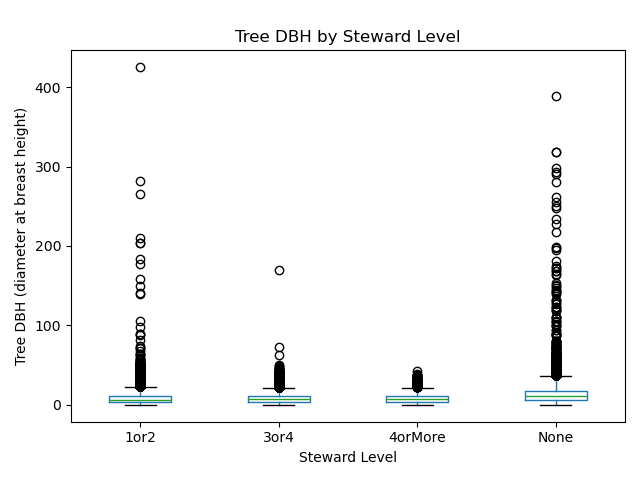

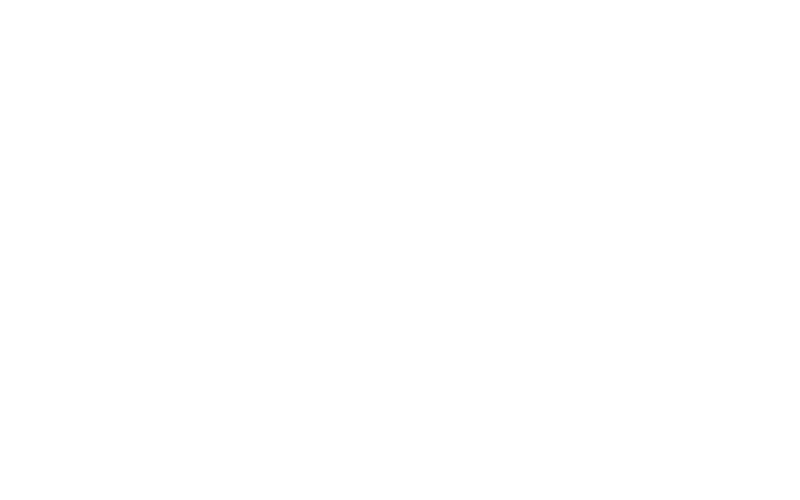

In [7]:
tree_df = pd.read_csv ('2015_Street_Tree_Census_-_Tree_Data_20250411.csv',na_values='',keep_default_na=False)

# Count the different values for the 'steward' parameter (including NaNs)
steward_counts = tree_df['steward'].value_counts(dropna=False)

# Convert these counts into percentages
steward_percentages = (steward_counts / steward_counts.sum()) * 100

# Describe how dbh (tree diameter) varies by steward category
dbh_by_steward = tree_df.groupby('steward')['tree_dbh'].describe()

# Create a boxplot to visualize dbh by steward
plt.figure(figsize=(8, 5))
tree_df.boxplot(column='tree_dbh', by='steward', grid=False)
plt.title('Tree DBH by Steward Level')
plt.suptitle('')
plt.xlabel('Steward Level')
plt.ylabel('Tree DBH (diameter at breast height)')
plt.tight_layout()
plt.show()

## ***Figure 1: Tree DBH by Steward Level***
* Shows the relationship between Tree Diameter at Breast Height and the level of stewardship

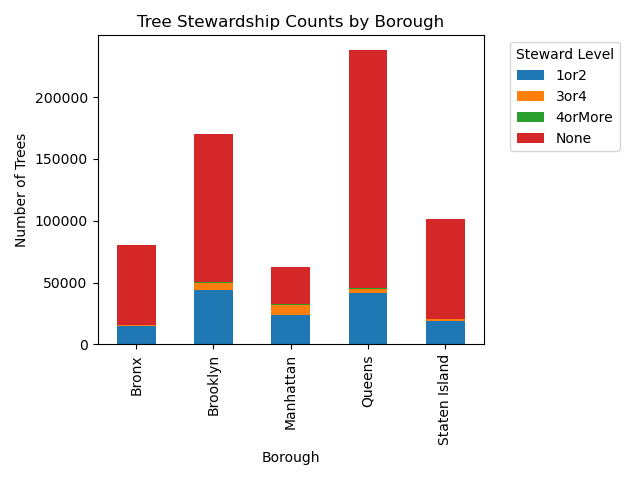

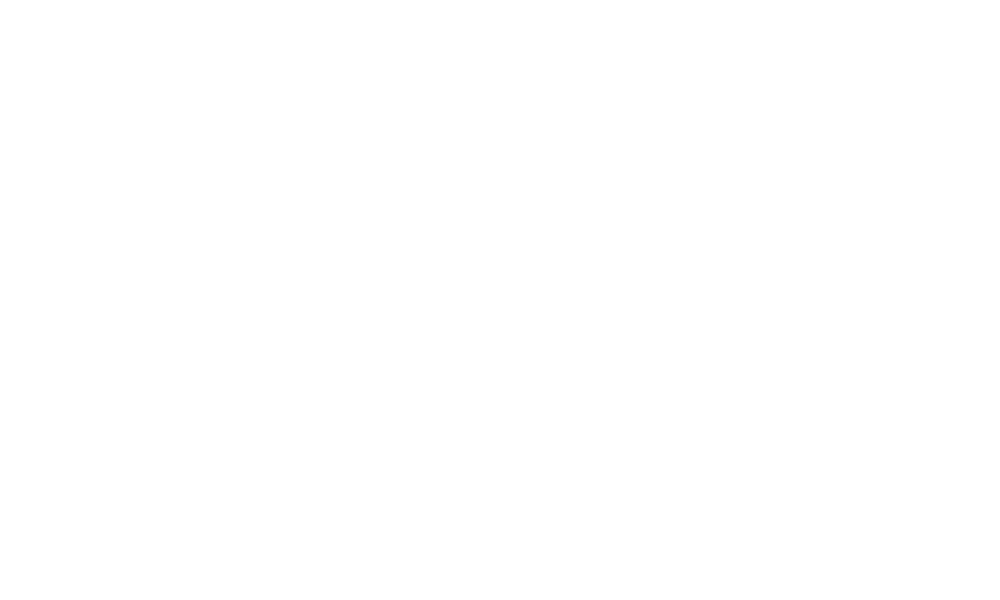

In [15]:
# Compare the counts of the 'steward' parameter across boroughs
steward_borough_counts = tree_df.groupby(['borough', 'steward']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
steward_borough_counts.plot(kind='bar', stacked=True)
plt.title('Tree Stewardship Counts by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Trees')
plt.legend(title='Steward Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## ***Figure 2: Tree Stewardship Counts by Borough***
* This stacked bar chart shows the absolute number of trees in each stewardship category per borough.
* It compares where the most trees are located and how stewardship levels differ in scale across boroughs.

In [17]:
# Convert to total percentages across all boroughs
total_count = steward_borough_counts.sum().sum()
steward_total_pct = steward_borough_counts.sum() / total_count * 100

print(steward_total_pct)

steward
1or2       22.012104
3or4        2.941397
4orMore     0.246867
None       74.799631
dtype: float64


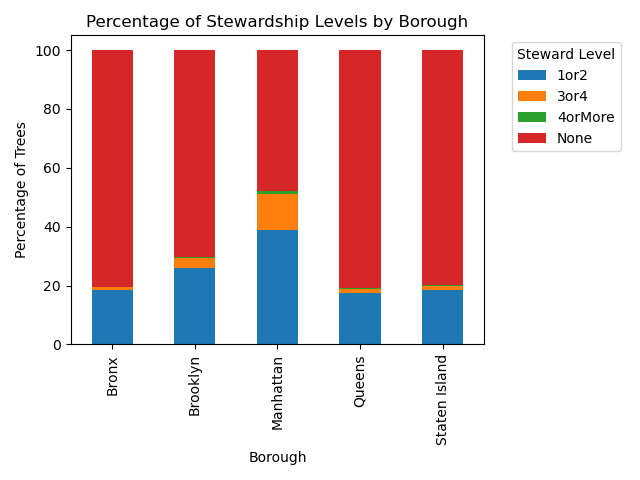

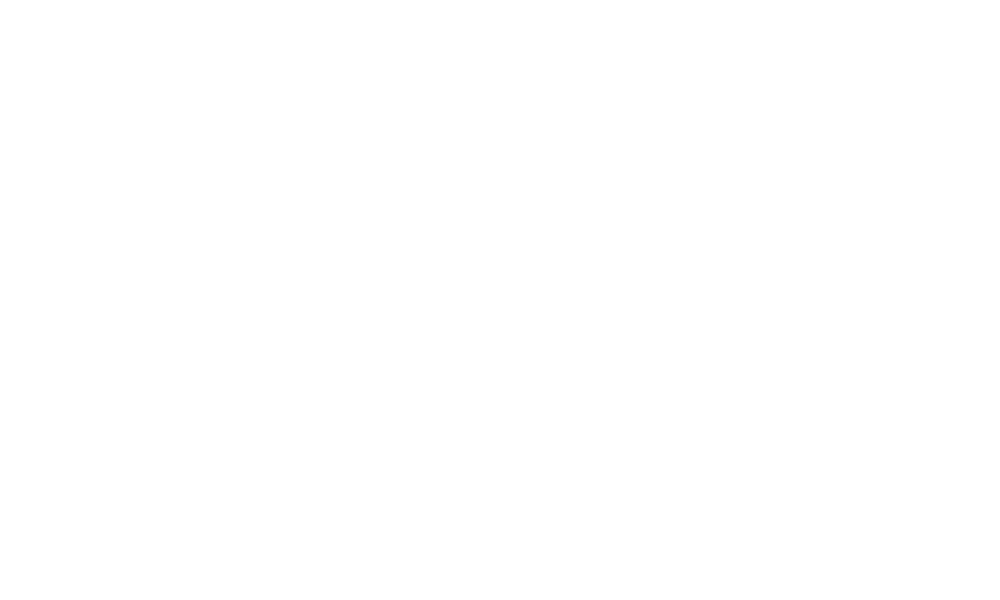

In [14]:
# Convert to percentage by borough (normalize row-wise)
steward_pct_by_borough = steward_borough_counts.div(steward_borough_counts.sum(axis=1), axis=0) * 100

# Stacked percentage bar chart: Stewardship percentages by borough
plt.figure(figsize=(10, 6))
steward_pct_by_borough.plot(kind='bar', stacked=True)
plt.title('Percentage of Stewardship Levels by Borough')
plt.xlabel('Borough')
plt.ylabel('Percentage of Trees')
plt.legend(title='Steward Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## ***Figure 3: Bar Chart of Percentage of Stewardship Levels by Boruough***
* This figure converts the raw counts into percentages
* Allows for the relative stewardship engagement can be compared across boroughs

## ***Findings***
* Queens has the highest total number of trees
* While having the lowest total number of trees, Manhattan has the highest rate of trees being stewarded

## ***Other Use Cases***
* This methodology is useful any time you want to understand how descriptive groupings (categorical variables) influence or correlate with a measurable outcome (continuous variable).

* An example from another one of my classes, would be from my persuasion at scale class
* Use Case: Political Microtargeting and Voter Turnout
    * Categorical variable: Political ad exposure group (e.g., identity-focused, issue-focused, fear-based, control)
    * Continuous variable: Voter turnout rate (or donation amount, time spent engaging)
    * Application: Group by ad type and compare average turnout or engagement across categories using .describe() and boxplots to uncover persuasive effectiveness.

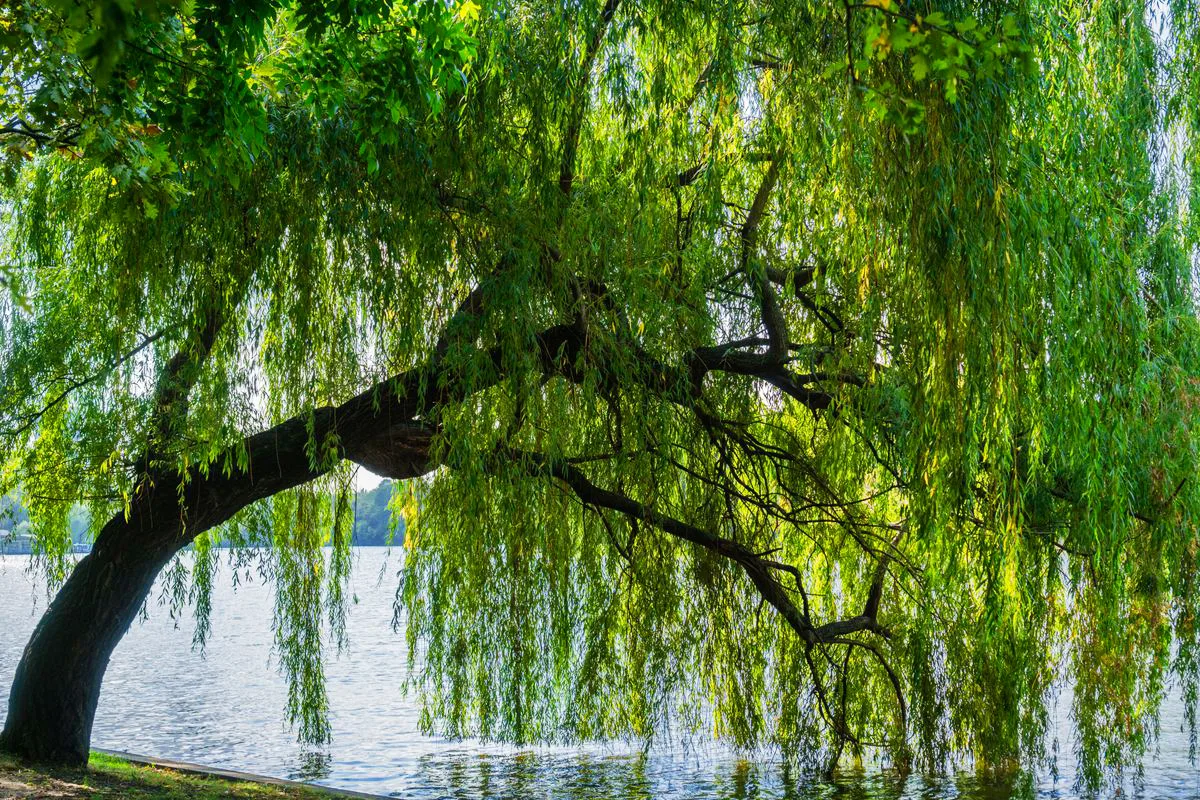

In [20]:
from IPython.display import Image
Image('Weeping_Willow_1.png',width=400)

## Picture of a Willow Tree
I am not sure if this tree directly relates to my data, but I am curious if it has a steward or not

## Final 5% Statistical Testing

In [22]:
# Defining the column to analyze and the grouping variable
col_for_data = 'tree_dbh'
col_to_group = 'steward'

# Drop NaNs in the grouping column
df_clean = tree_df.dropna(subset=[col_to_group])

# Perform one-way ANOVA
f_val, p_val = stats.f_oneway(*df_clean.groupby(col_to_group)[col_for_data].apply(lambda x: x.values))
print('F value: {:.3f}, p value: {:.3f}\n'.format(f_val, p_val))

# Perform Tukey's HSD test
mod = MultiComparison(df_clean[col_for_data], df_clean[col_to_group])
print(mod.tukeyhsd())

F value: 10850.311, p value: 0.000

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
   1or2    3or4   0.0997 0.4137 -0.0667 0.2661  False
   1or2 4orMore   0.1173  0.945 -0.4252 0.6599  False
   1or2    None   4.3487    0.0  4.2837 4.4137   True
   3or4 4orMore   0.0176 0.9998 -0.5441 0.5793  False
   3or4    None   4.2489    0.0  4.0896 4.4083   True
4orMore    None   4.2313    0.0  3.6909 4.7717   True
-----------------------------------------------------


## ***Statistical Test Summary***
* A one-way ANOVA revealed that tree diameter (dbh) differs significantly across stewardship levels (F = 10850.31, p < 0.001).

* Tukey’s HSD test shows that trees with no steward are significantly different in size compared to all other categories (1or2, 3or4, 4orMore).

* No significant differences were found between the actively stewarded groups (1or2, 3or4, 4orMore) — suggesting any level of stewardship may be beneficial, but the key contrast is between having stewardship vs. none at all.